In [83]:
# Cell for loading data

import os
import numpy as np
scores = {}
# Mapper between filename and label inside the ndcg results
name_mapper = {
    "gt-wndomains_ranking": "wn-domains:",
    "gt-wordnet_restricted": "wordnet_restricted:",
    "gt-wordnet_original": "wordnet_original:",
    "gt-google_list": "google:",
    "gt-wikipedia_disambiguation_rank": "wikipedia:",
    "gt-ontonotes_ranking": "ontonotes:",
    "gt-frequency_ranking": "frequency:",    
    "gt-random_ranking": "random:",  
    "gt-pca6_L11": "pyramid_pca6_L11:",
}


for name in os.listdir('ndcg'):
    fname = 'ndcg/' + name
    if '-' not in fname:
        continue
    name = name_mapper[name.split(".")[0]]
    
    with open(fname, 'r') as f:
        for line in f:
            resname, resscore = line.replace("\n", "").split()
            # Use this to ignore the rest of the pyramid
            if resname not in ['pyramid_pca6_L11:'] and 'pyramid' in resname or 'random2' in resname:
                continue
                
            scores[name] = scores.get(name, {})
            scores[name][resname] = float(resscore)
print(scores.keys())
indx = list(scores.keys())
del indx[indx.index("frequency:")] # Put it last in the index
indx.append('frequency:')
data = np.zeros((len(indx), len(indx)))
for k, values in scores.items():
    for k2, v in values.items():
#         print(k, k2, indx.index(k), indx.index(k2), v)
        data[indx.index(k)][indx.index(k2)] = v

dict_keys(['frequency:', 'wordnet_restricted:', 'wordnet_original:', 'google:', 'random:', 'pyramid_pca6_L11:', 'ontonotes:', 'wn-domains:', 'wikipedia:'])


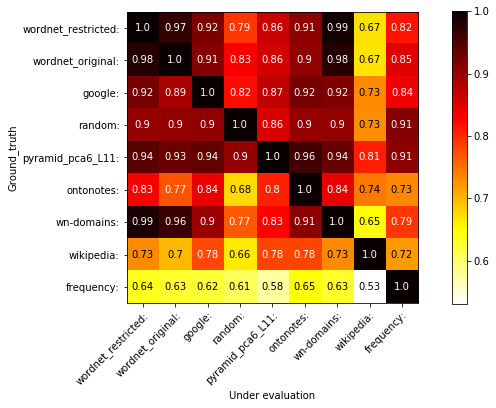

In [84]:
# Cell for heatmap
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(7)

# Previous color: YlGn
im = ax.imshow(data, cmap='hot_r')

# We want to show all ticks...
ax.set_xticks(np.arange(len(indx)))
ax.set_yticks(np.arange(len(indx)))
# ... and label them with the respective list entries
ax.set_xticklabels(indx)
ax.set_yticklabels(indx)

ax.set_xlabel('Under evaluation')
ax.set_ylabel('Ground_truth')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(indx)):
    for j in range(len(indx)):
        color='w'
        if round(data[i, j], 2) < 0.75:
            color='black'
        text = ax.text(j, i, round(data[i, j], 2), ha="center", va="center", color=color)
        

cbar = ax.figure.colorbar(im, ax=ax, fraction=0.043, pad=0.1)
fig.tight_layout()
plt.savefig("heatplot.png")
plt.show()